# Problem Description and Data

The 'Natrural Language Processing with Disaster Tweets' competition challenges to build a ML model that predicts which tweet is talking about a disaster event and which one is not. This challenge provides a training dataset with 10,000 tweets that are classified by hand, and a test dataset that is not classified. Each data set has 'keyword', 'location' and 'text' features.

In [48]:
df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
print(df_train.loc[[46]])
print(df_train.shape)

    id keyword                   location  \
46  66  ablaze  GREENSBORO,NORTH CAROLINA   

                                                 text  target  
46  How the West was burned: Thousands of wildfire...       1  
(7613, 5)


In [49]:
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
print(df_test.head(2))
print(df_test.shape)

   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
(3263, 4)


In [4]:
#missing 'keyword' and 'location' in percentage
print("Missing 'keyword': ", (df_train['keyword'].isna().sum()/len(df_train)*100).round(2), '%')
print("Missing 'location': ", (df_train['location'].isna().sum()/len(df_train)*100).round(2), '%')

Missing 'keyword':  0.8 %
Missing 'location':  33.27 %


In [5]:
import matplotlib.pyplot as plt

Number of disaster tweets:  3271
Number of non-disaster tweets:  4342


([<matplotlib.patches.Wedge at 0x780b4819a500>,
 [Text(-0.24110481617711207, 1.0732513534192263, 'non-disaster'),
  Text(0.24110481617711216, -1.0732513534192263, 'disaster')],
 [Text(-0.13151171791478838, 0.5854098291377597, '57.0%'),
  Text(0.13151171791478844, -0.5854098291377597, '43.0%')])

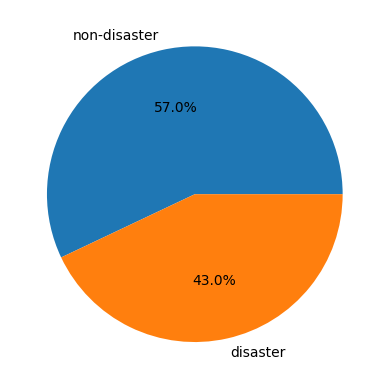

In [6]:
# number of disaster vs non-disaster tweets
dis = (df_train['target']==1).sum()
non_dis = (df_train['target']==0).sum()
print('Number of disaster tweets: ', dis)
print('Number of non-disaster tweets: ', non_dis)

plt.pie([non_dis, dis], labels = ['non-disaster', 'disaster'], autopct='%1.1f%%')

By looking at the training dataset, the 'keyword' feature is missing 0.8% of data and the 'location' feature is missing 33.27% of data. Also, the 57.0% of the data is non-disasterous tweets and the rest of the 43.0% of data is disasterous tweets.

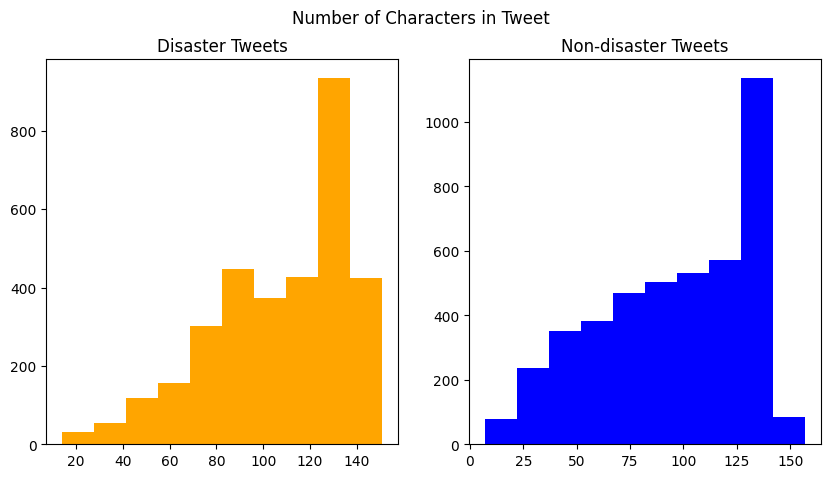

In [7]:
# show number of characters in each type of tweets
df_train_len_dis = df_train[df_train['target']==1]['text'].str.len()
df_train_len_non_dis = df_train[df_train['target']==0]['text'].str.len()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(df_train_len_dis,color='orange')
ax1.set_title('Disaster Tweets')
ax2.hist(df_train_len_non_dis,color='blue')
ax2.set_title('Non-disaster Tweets')
fig.suptitle('Number of Characters in Tweet')
plt.show()

By looking at the distributions above, it can be seen that both kinds of tweets have 140 - 150 average number of characters per tweet.

In [8]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0.98, 'Average Word Length in Tweet')

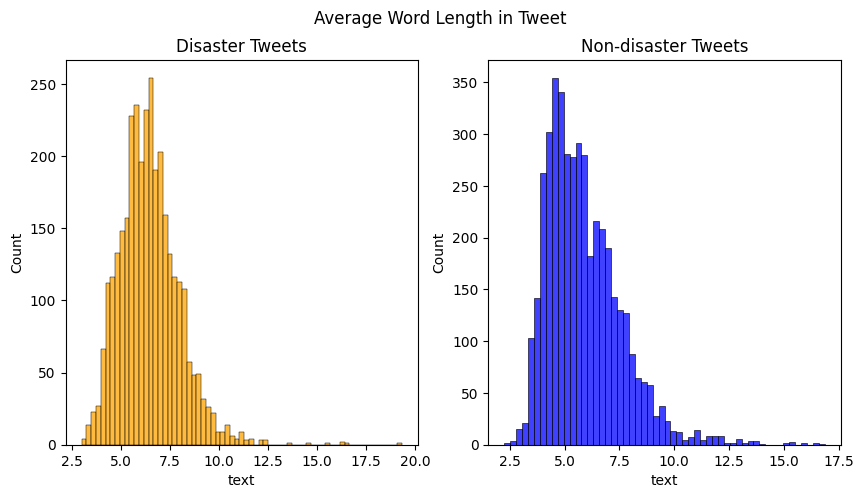

In [47]:
# average number of character in each type of tweets
df_train_avg_dis = df_train[df_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
df_train_avg_non_dis = df_train[df_train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_train_avg_dis, ax=ax1, color='orange')
ax1.set_title('Disaster Tweets')
sns.histplot(df_train_avg_non_dis, ax=ax2, color='blue')
ax2.set_title('Non-disaster Tweets')
fig.suptitle('Average Word Length in Tweet')

As it can be seen from the graphs above, both disasterous and non-disasterous tweets have similar average word length which is around 5 characters.

In [10]:
from nltk.corpus import stopwords

Text(0.5, 1.0, 'Top 10 Frequent words Used in Disaster Tweets')

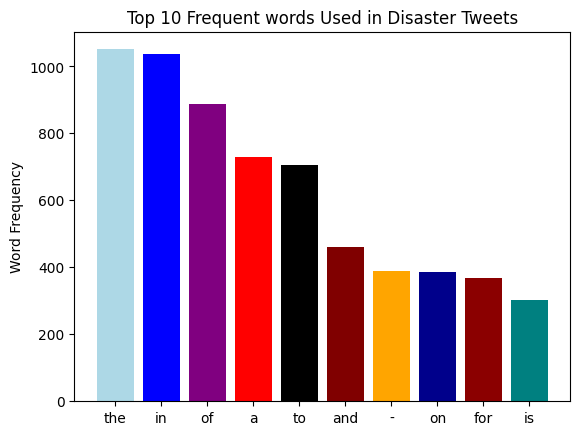

In [11]:
# view top 10 most frequent used words
all_words_dis = df_train[df_train['target']==1]['text'].str.split(expand=True).unstack().value_counts()
x = all_words_dis.index.values[0:10]
y = all_words_dis.values[0:10]
color = ['lightblue', 'blue', 'purple', 'red', 'black', 'maroon', 'orange', 'darkblue', 'darkred', 'teal']
graph = plt.bar(x,y, color=color)
plt.ylabel('Word Frequency')
plt.title('Top 10 Frequent words Used in Disaster Tweets')

Text(0.5, 1.0, 'Top 10 Frequent words Used in Non-Disaster Tweets')

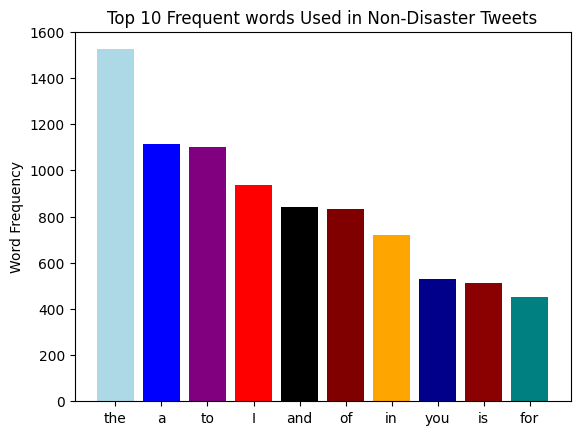

In [12]:
all_words_non_dis = df_train[df_train['target']==0]['text'].str.split(expand=True).unstack().value_counts()
x = all_words_non_dis.index.values[0:10]
y = all_words_non_dis.values[0:10]
color = ['lightblue', 'blue', 'purple', 'red', 'black', 'maroon', 'orange', 'darkblue', 'darkred', 'teal']
graph = plt.bar(x,y, color=color)
plt.ylabel('Word Frequency')
plt.title('Top 10 Frequent words Used in Non-Disaster Tweets')

The frequent word usage in both kind of tweets ended up being a 'stop word' which needs to be cleaned from the datasets.

Text(0.5, 1.0, 'Most Used Punctuations in Tweets')

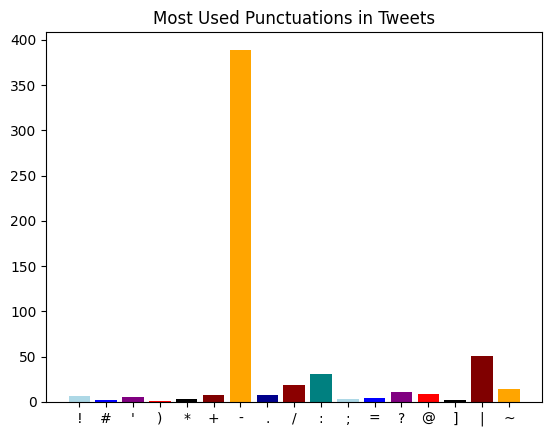

In [13]:
import string
punct = []
punct_num = []

for p in string.punctuation:
    if p in all_words_dis:
        punct.append(p)
        punct_num.append(all_words_dis[p])

        
plt.bar(punct,punct_num, color=color)
plt.title('Most Used Punctuations in Tweets')

It is also seems that data set has alot of misc. characters which also needs to be removed from each tweet before training the data.

# Data Cleaninng

The cleaning must be preformed based on the EDA section. The following cleaning steps was performed:

- remove stop words 
- remove URL
- remove HTML
- remove punctuations
- make everyting lowercase
- lematization

These steps were performed for both the training and test datasets.

In [14]:
example = '@aria_ahrary @thetawniest the out of control, m1.94 [01:04 utc]?5km s of volcano hawaii, #wildfires'

In [15]:
import nltk
import re

#remove stop words
stop_words = stopwords.words('english')

def del_stopwords (tweet):
    return ' '.join([word for word in tweet.split() if word not in stop_words])

example = del_stopwords(example)
print(example)

df_train['new_text'] = df_train['text'].apply(lambda x : del_stopwords(x))
df_test['new_text'] = df_test['text'].apply(lambda x : del_stopwords(x))

@aria_ahrary @thetawniest control, m1.94 [01:04 utc]?5km volcano hawaii, #wildfires


In [16]:
#remove url
def del_URL(tweet):
    return re.compile(r'https?://\S+|www\.\S+').sub(r'',tweet)

example = del_URL(example)
print(example)

df_train['new_text'] = df_train['new_text'].apply(lambda x : del_URL(x))
df_test['new_text'] = df_test['new_text'].apply(lambda x : del_URL(x))

@aria_ahrary @thetawniest control, m1.94 [01:04 utc]?5km volcano hawaii, #wildfires


In [17]:
# remove html
def del_html(tweet):
    return re.compile(r'<.*?>').sub(r'', tweet)

example = del_html(example)
print(example)

df_train['new_text'] = df_train['new_text'].apply(lambda x : del_html(x))
df_test['new_text'] = df_test['new_text'].apply(lambda x : del_html(x))

@aria_ahrary @thetawniest control, m1.94 [01:04 utc]?5km volcano hawaii, #wildfires


In [18]:
# remolve punctuations
def del_punct(tweet):
    return tweet.translate(str.maketrans('','',string.punctuation))

example = del_punct(example)
print(example)

df_train['new_text'] = df_train['new_text'].apply(lambda x : del_punct(x))
df_test['new_text'] = df_test['new_text'].apply(lambda x : del_punct(x))

ariaahrary thetawniest control m194 0104 utc5km volcano hawaii wildfires


In [19]:
#lowercase
def lowercase(tweet):
    return tweet.lower()

example = lowercase(example)
print(example)

df_train['new_text'] = df_train['new_text'].apply(lambda x : lowercase(x))
df_test['new_text'] = df_test['new_text'].apply(lambda x : lowercase(x))
df_train['new_text']

ariaahrary thetawniest control m194 0104 utc5km volcano hawaii wildfires


0        our deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       all residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       just got sent photo ruby alaska smoke wildfire...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest the control wild fires ...
7610                   m194 0104 utc5km s volcano hawaii 
7611    police investigating ebike collided car little...
7612    the latest more homes razed northern californi...
Name: new_text, Length: 7613, dtype: object

In [20]:
#if you have a nltk.downlaod error, it is cause it cannot unzip the package
#to do this manually, run the following: !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
#source for this fix is: https://www.kaggle.com/discussions/general/395169

#lemmatization
from nltk.stem import WordNetLemmatizer

def lemmatize(tweet):
    return ' '.join([WordNetLemmatizer().lemmatize(word) for word in tweet.split()])

example = lemmatize(example)
print(example)

df_train['new_text'] = df_train['new_text'].apply(lambda x : lemmatize(x))
df_test['new_text'] = df_test['new_text'].apply(lambda x : lemmatize(x))

ariaahrary thetawniest control m194 0104 utc5km volcano hawaii wildfire


In [21]:
#view cleaned data
#df_train['new_text']
df_train.head()

,id,keyword,location,text,target,new_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all resident asked shelter place notified offi...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent photo ruby alaska smoke wildfire...


# Vectorization

In [22]:
#Vectorization : https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
from nltk.tokenize import word_tokenize
corpus=[]
df = pd.concat([df_train, df_test])
df.drop(columns=['text','location'])
for tweet in df['new_text']:
    words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop_words))]
    corpus.append(words)

#Glove reference for following code: https://www.kaggle.com/code/stacykurnikova/using-glove-embedding
#for the vector, we will be using the glove 6B 100D, meaning the model will be trained on 6 billion words
#and generate 100 dimensional word embeddings

#For this, make sure to download the glove file located: https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation
#you can also hit add input on kaggle and search for the dataset to add to the notebook
embedding_dict={}
with open('/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors

f.close()

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#https://neptune.ai/blog/vectorization-techniques-in-nlp-guide section on glove
MAX_LEN=50
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences=tokenizer.texts_to_sequences(corpus)
word_index=tokenizer.word_index
print('Number of unique words:',len(word_index))

data=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

2024-06-09 00:40:29.908765: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 00:40:29.908853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 00:40:29.910964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Number of unique words: 18590


In [24]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in word_index.items():
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

# Model 1
The model below is a LSTM model built in Keras Sequential. There is a embedding layer, a dropout layer, a lstm layer, and a dense layer. For the learning rate, I have it set to .001 and I am using the adam optimizer.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from tensorflow.keras.initializers import Constant
from tensorflow.keras import Input

model=Sequential()

embedding=Embedding(num_words,100)
model.add(Input(shape=(50,)))
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])




In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 100)        │     1,859,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 50, 100)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         7,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,866,605 (7.12 MB)

 Trainable params: 1,866,605 (7.12 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
train=data[:df_train.shape[0]]
test=data[df_train.shape[0]:]

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,df_train['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [29]:
history=model.fit(X_train,y_train,batch_size=3,epochs=20,validation_data=(X_test,y_test),verbose=2)

Epoch 1/20
2157/2157 - 56s - 26ms/step - accuracy: 0.5715 - loss: 0.6847 - val_accuracy: 0.5543 - val_loss: 0.6874
Epoch 2/20
2157/2157 - 53s - 24ms/step - accuracy: 0.5732 - loss: 0.6833 - val_accuracy: 0.5543 - val_loss: 0.6875
Epoch 3/20
2157/2157 - 55s - 25ms/step - accuracy: 0.5732 - loss: 0.6834 - val_accuracy: 0.5543 - val_loss: 0.6894
Epoch 4/20
2157/2157 - 55s - 26ms/step - accuracy: 0.5732 - loss: 0.6830 - val_accuracy: 0.5543 - val_loss: 0.6878
Epoch 5/20
2157/2157 - 82s - 38ms/step - accuracy: 0.5732 - loss: 0.6832 - val_accuracy: 0.5543 - val_loss: 0.6881
Epoch 6/20
2157/2157 - 55s - 26ms/step - accuracy: 0.5732 - loss: 0.6829 - val_accuracy: 0.5543 - val_loss: 0.6893
Epoch 7/20
2157/2157 - 56s - 26ms/step - accuracy: 0.5732 - loss: 0.6828 - val_accuracy: 0.5543 - val_loss: 0.6875
Epoch 8/20
2157/2157 - 55s - 25ms/step - accuracy: 0.5732 - loss: 0.6828 - val_accuracy: 0.5543 - val_loss: 0.6877
Epoch 9/20
2157/2157 - 82s - 38ms/step - accuracy: 0.5732 - loss: 0.6829 - val_a

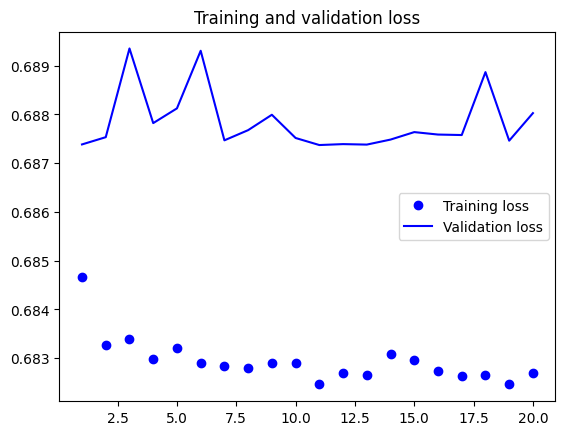

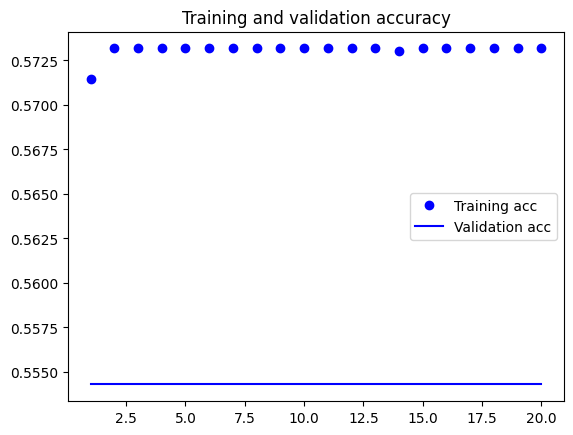

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt


def plot_loss_accuracy(fit_model):
    acc = fit_model.history['accuracy']
    val_acc = fit_model.history['val_accuracy']
    loss = fit_model.history['loss']
    val_loss = fit_model.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

# display the loss and accuracy curves
plot_loss_accuracy(history)

In [31]:
from sklearn import metrics
metrics.roc_auc_score(y_test,model.predict(X_test))

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


0.5320300933900688

In [32]:
def generate_submission(filename, prediction):
    sample_submission=pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
    sub=pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediction})
    sub.to_csv(f'{filename}.csv',index=False)

In [33]:
y_predict=model.predict(test)
y_predict=np.round(y_predict).astype(int).reshape(3263)
generate_submission('model_1_submission', y_predict)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


# Analysis

From this model, notice that the roc_auc_score is 0.5320300933900688, from this score we can say this model is not great. Looking at the accuracy plot, there is a drastic difference between the validation and training set. This difference means that our model has poor generalization. Submitting the results to the leaderboard yielded a public score of 0.57033.



# Model 2
The model below has the same architecture as model 1. The difference is that the learning rate is now set to .00001 and the batch size is much larger.

In [34]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),trainable=False)
model.add(Input(shape=(50,)))
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 100)        │     1,859,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 50, 100)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         7,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,866,605 (7.12 MB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 1,859,100 (7.09 MB)

In [35]:
history=model.fit(X_train,y_train,batch_size=2,epochs=20,validation_data=(X_test,y_test),verbose=2)

Epoch 1/20
3236/3236 - 63s - 20ms/step - accuracy: 0.5733 - loss: 0.6917 - val_accuracy: 0.5543 - val_loss: 0.6910
Epoch 2/20
3236/3236 - 58s - 18ms/step - accuracy: 0.5732 - loss: 0.6887 - val_accuracy: 0.5543 - val_loss: 0.6891
Epoch 3/20
3236/3236 - 58s - 18ms/step - accuracy: 0.5732 - loss: 0.6857 - val_accuracy: 0.5543 - val_loss: 0.6869
Epoch 4/20
3236/3236 - 59s - 18ms/step - accuracy: 0.5732 - loss: 0.6809 - val_accuracy: 0.5543 - val_loss: 0.6824
Epoch 5/20
3236/3236 - 58s - 18ms/step - accuracy: 0.5750 - loss: 0.6706 - val_accuracy: 0.5543 - val_loss: 0.6691
Epoch 6/20
3236/3236 - 59s - 18ms/step - accuracy: 0.5959 - loss: 0.6560 - val_accuracy: 0.5552 - val_loss: 0.6440
Epoch 7/20
3236/3236 - 60s - 18ms/step - accuracy: 0.6214 - loss: 0.6455 - val_accuracy: 0.6602 - val_loss: 0.6190
Epoch 8/20
3236/3236 - 58s - 18ms/step - accuracy: 0.6492 - loss: 0.6311 - val_accuracy: 0.7461 - val_loss: 0.5952
Epoch 9/20
3236/3236 - 58s - 18ms/step - accuracy: 0.6673 - loss: 0.6250 - val_a

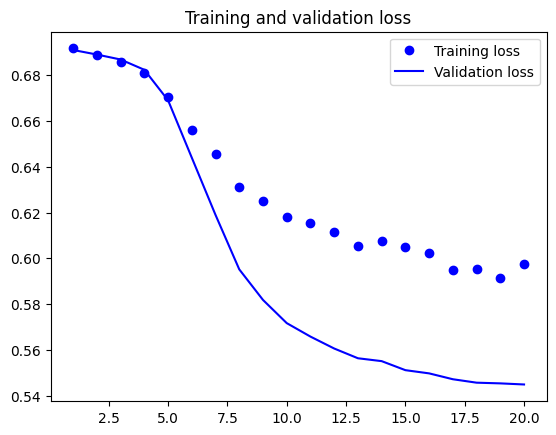

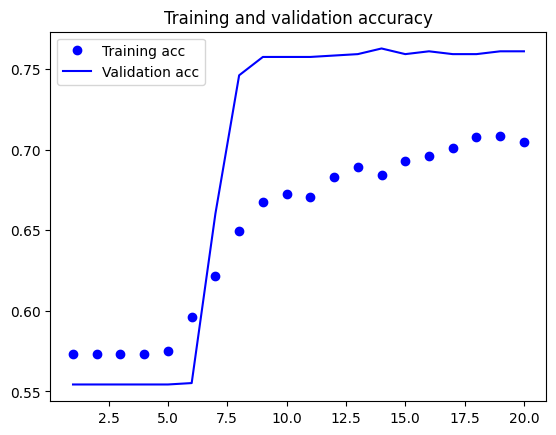

<Figure size 640x480 with 0 Axes>

In [36]:
plot_loss_accuracy(history)

In [37]:
metrics.roc_auc_score(y_test,model.predict(X_test))

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


0.8316961362148003

In [38]:
y_predict=model.predict(test)
y_predict=np.round(y_predict).astype(int).reshape(3263)
generate_submission('model_2_submission', y_predict)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


# Analysis

From this model, notice that the roc_auc_score is 0.8316961362148003, comparing this to the first model, we see a large improvement from our hyperparameter tuning. Looking at the accuracy plot, there is not as drastic of a difference between the validation and training set as in the first model. From the plots, we can state that we have better generalization than the first model. Submitting the results to the leaderboard yielded a public score of 0.77229. This model has a better performance than the first model submission.

# Model 3
The model below has the same architecture as model 2. The difference is that the batch size is much larger for this model and there are more nodes present in the LSTM layer of the model. This model originally leveraged the same adam optimizer as in the other two models. With that model, the submission score was 0.76677 on the public leaderboard. After achieving this score, I wanted model 3 to perform better than model 2 and had the idea to use the adamw optimizer instead to see if there was any drastic perfomance boost.

In [39]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),trainable=False)
model.add(Input(shape=(50,)))
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import AdamW
optimzer=AdamW(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 100)        │     1,859,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ (None, 50, 100)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,876,157 (7.16 MB)

 Trainable params: 17,057 (66.63 KB)

 Non-trainable params: 1,859,100 (7.09 MB)

In [40]:
history=model.fit(X_train,y_train,batch_size=1,epochs=20,validation_data=(X_test,y_test),verbose=2)

Epoch 1/20
6471/6471 - 90s - 14ms/step - accuracy: 0.5733 - loss: 0.6900 - val_accuracy: 0.5543 - val_loss: 0.6889
Epoch 2/20
6471/6471 - 87s - 13ms/step - accuracy: 0.5732 - loss: 0.6850 - val_accuracy: 0.5543 - val_loss: 0.6871
Epoch 3/20
6471/6471 - 86s - 13ms/step - accuracy: 0.5732 - loss: 0.6828 - val_accuracy: 0.5543 - val_loss: 0.6869
Epoch 4/20
6471/6471 - 87s - 13ms/step - accuracy: 0.5732 - loss: 0.6814 - val_accuracy: 0.5543 - val_loss: 0.6859
Epoch 5/20
6471/6471 - 88s - 14ms/step - accuracy: 0.5732 - loss: 0.6777 - val_accuracy: 0.5543 - val_loss: 0.6763
Epoch 6/20
6471/6471 - 140s - 22ms/step - accuracy: 0.5767 - loss: 0.6581 - val_accuracy: 0.5569 - val_loss: 0.6299
Epoch 7/20
6471/6471 - 99s - 15ms/step - accuracy: 0.6450 - loss: 0.6208 - val_accuracy: 0.7601 - val_loss: 0.5641
Epoch 8/20
6471/6471 - 140s - 22ms/step - accuracy: 0.6923 - loss: 0.6057 - val_accuracy: 0.7811 - val_loss: 0.5372
Epoch 9/20
6471/6471 - 94s - 15ms/step - accuracy: 0.7158 - loss: 0.5910 - val

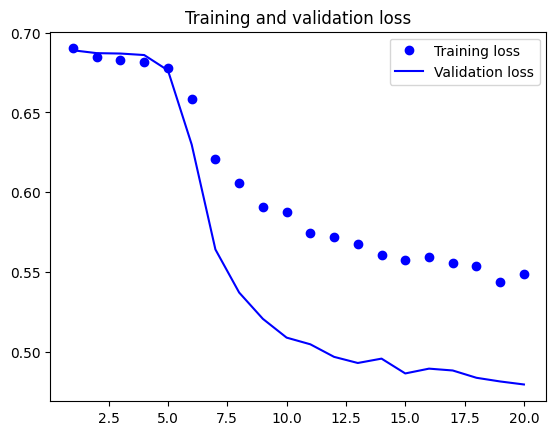

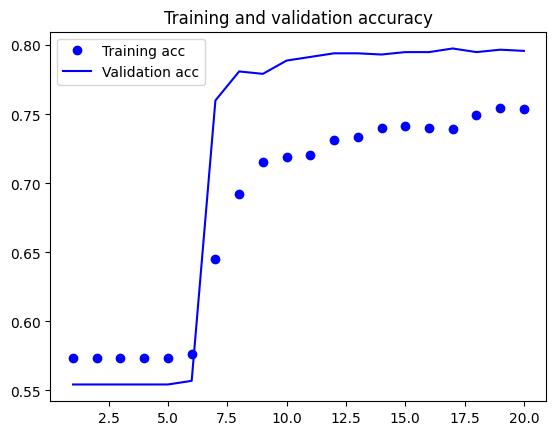

<Figure size 640x480 with 0 Axes>

In [41]:
plot_loss_accuracy(history)

In [42]:
metrics.roc_auc_score(y_test,model.predict(X_test))

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


0.8597441937696502

In [43]:
y_predict=model.predict(test)
y_predict=np.round(y_predict).astype(int).reshape(3263)
generate_submission('model_3_submission', y_predict)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


# Analysis

From this model, notice that the roc_auc_score is 0.8597441937696502, comparing this to the second model, there is only a slight improvement. Looking at the accuracy plot, there is not as drastic of a difference between the validation and training set which aligns with our second model. With the slight tweaks discussed in the model section above, submitting the results to the leaderboard yielded a public score of 0.77536. This was only slightly better than our model 2 submission but does show some improvement with the tweaks that were performed for this model.

# Conclusion

From the three models presented in this notebook, it can be stated that our hyperparameter tuning between each model did provide performance improvements. In the future to make the models perform better, we could take advantage of better cleaning techniques. Two things that could help from a data cleaning perspective would be to spell check the tweets and remove the entirety of the user from the text. In our cleaning we cleaned up the @ but not the text that followed it. Another thing that would be nice to try in the future would be to test the performance of the LSTM models against a simple RNN or a GRU model. 

# References

All references are noted in the appropriate cells above. References can be found throughout this notebook tagged in the python comments.